# 한글패치

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기

In [75]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer

train = pd.read_csv(r"C:\Users\rhdwo\OneDrive\바탕 화면\1차프로젝트 데이터\train.csv")
train.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1


# 변수별 결측치 개수 확인

In [9]:
print(train[['전용면적', '해당층', '총층', '욕실수', '총주차대수']].isna().sum())

전용면적     787
해당층      229
총층        16
욕실수       18
총주차대수    696
dtype: int64


# 결측치 제거

In [10]:
df = train[['전용면적', '해당층', '총층', '방수', '욕실수', '총주차대수']]
df_drop_rows = df.dropna()
print(df_drop_rows.isna().sum())

전용면적     0
해당층      0
총층       0
방수       0
욕실수      0
총주차대수    0
dtype: int64


# 히스토그램 확인

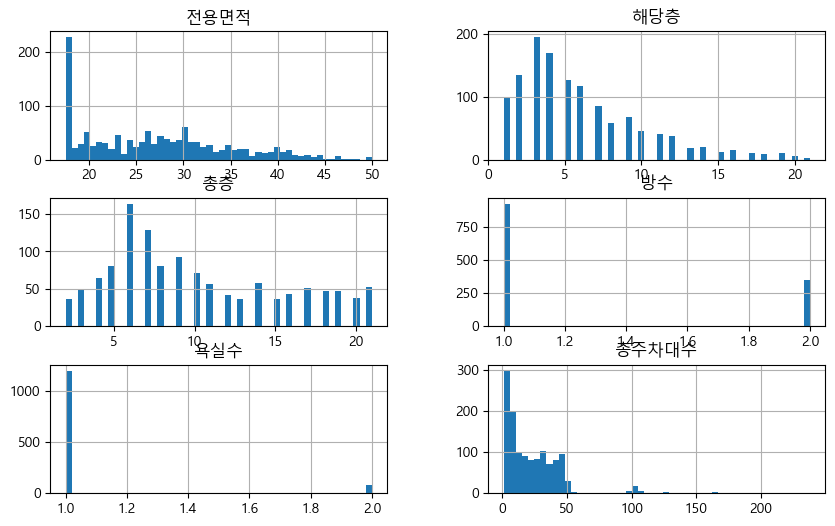

In [11]:
df_drop_rows.hist(bins = 50, figsize = (10,6))
plt.show()

<Axes: >

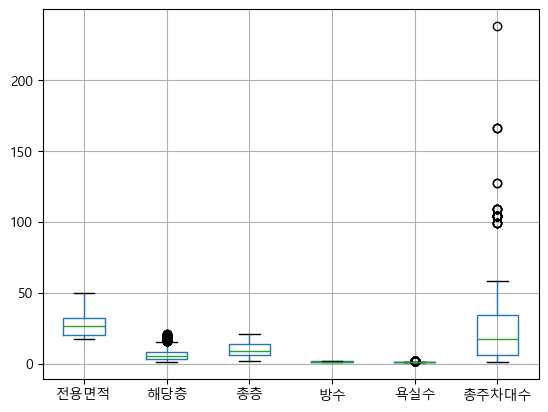

In [12]:
df_drop_rows.boxplot()

In [13]:
df_drop_rows.describe()

,전용면적,해당층,총층,방수,욕실수,총주차대수
count,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000
mean,27.100487,5.959969,10.256672,1.274725,1.062794,22.525118
std,7.736014,4.124435,5.362805,0.446551,0.242688,22.118543
min,17.500000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,19.842500,3.000000,6.000000,1.000000,1.000000,6.000000
50%,26.530000,5.000000,9.000000,1.000000,1.000000,17.000000
75%,31.932500,8.000000,14.000000,2.000000,1.000000,34.000000
max,49.970000,21.000000,21.000000,2.000000,2.000000,238.000000


In [ ]:
-----------------------------------------------------------------------------------------------------

# 변수별 가설검정

### 카이제곱 검정

In [90]:
# H0 : 보증금과 허위매물에 관계가 없다.
# H1 : 보증금과 허위매물에 관계가 있다.

from scipy import stats
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


train_Cross = pd.crosstab(train['보증금'], train['허위매물여부'])
train_Cross

chi2,p,dof,ef = stats.chi2_contingency(train_Cross, correction = False)

print("Chi_squared statistic:", chi2)
print("p-value:", p)
print("DOF", dof)
print("Expected frequencies", ef)

alpha = 0.05
if p < alpha:
    print("\n귀무가설 기각 : 두 변수는 관계가 있다.")
else:
    print("\n귀무가설 채택 : 두 변수는 관계가 없다.")

Chi_squared statistic: 500.35373397174817
p-value: 0.006784252480322361
DOF 425
Expected frequencies [[ 4.39233279  0.60766721]
 [ 6.14926591  0.85073409]
 [12.29853181  1.70146819]
 [ 7.90619902  1.09380098]
 [ 7.02773246  0.97226754]
 [ 6.14926591  0.85073409]
 [ 8.78466558  1.21533442]
 [ 7.02773246  0.97226754]
 [ 2.63539967  0.36460033]
 [10.54159869  1.45840131]
 [ 0.87846656  0.12153344]
 [13.17699837  1.82300163]
 [ 5.27079935  0.72920065]
 [ 8.78466558  1.21533442]
 [ 7.90619902  1.09380098]
 [12.29853181  1.70146819]
 [ 8.78466558  1.21533442]
 [10.54159869  1.45840131]
 [ 8.78466558  1.21533442]
 [ 9.66313214  1.33686786]
 [ 6.14926591  0.85073409]
 [11.42006525  1.57993475]
 [ 7.02773246  0.97226754]
 [ 9.66313214  1.33686786]
 [12.29853181  1.70146819]
 [ 6.14926591  0.85073409]
 [ 8.78466558  1.21533442]
 [ 9.66313214  1.33686786]
 [ 9.66313214  1.33686786]
 [11.42006525  1.57993475]
 [ 2.63539967  0.36460033]
 [ 9.66313214  1.33686786]
 [11.42006525  1.57993475]
 [ 7.906

### ANOVA 검정-이원분석?????

In [54]:
# ANOVA 검정-이원분석????????????????????

# H0-1 : 월세와 관리비 변수의 상호작용 효과가 없다.
# H0-2 : 월세 변수에 따른 허위매물여부변수의 값에는 차이가 없다.
# H0-3 : 관리비 변수에 따른 허위매물여부변수의 값에는 차이가 없다.

# H1-1 : 월세와 관리비 변수의 상호작용 효과가 있다.
# H1-2 : 월세 변수에 따른 허위매물여부변수의 값에는 차이가 있다.
# H1-3 : 관리비 변수에 따른 허위매물여부변수의 값에는 차이가 있다.

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


formula = '허위매물여부 ~ 월세 + 관리비'
model = ols(formula, data = train).fit()

anova_results = anova_lm(model)
print(anova_results)



              df      sum_sq   mean_sq          F        PR(>F)
월세           1.0    0.120315  0.120315   1.150916  2.834631e-01
관리비          1.0    5.648567  5.648567  54.033499  2.672717e-13
Residual  2449.0  256.014153  0.104538        NaN           NaN


### ANOVA 분석- 일원분석?????

In [59]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# H0 : 허위매물여부는 월세에 영향을 미치지 않는다.
# H1 : 허위매물여부는 월세에 영향을 미친다.
model_rent = ols('월세 ~ 허위매물여부', data = train).fit()
anova_rent = sm.stats.anova_lm(model_rent)

# H0 : 허위매물여부는 관리비에 영향을 미치지 않는다.
# H1 : 허위매물여부는 관리비에 영향을 미친다.
model_fee = ols('관리비 ~ 허위매물여부', data = train).fit()
anova_fee = sm.stats.anova_lm(model_fee)

print(anova_rent, anova_fee)


              df        sum_sq       mean_sq         F    PR(>F)
허위매물여부       1.0  4.800064e+10  4.800064e+10  1.126531  0.288621
Residual  2450.0  1.043927e+14  4.260925e+10       NaN       NaN               df        sum_sq      mean_sq          F        PR(>F)
허위매물여부       1.0   1631.673124  1631.673124  52.537678  5.630613e-13
Residual  2450.0  76090.137643    31.057199        NaN           NaN


## 결과해석
### 1.월세와 허위매물여부간 분석
###   -p값이 0.05보다 크기떄문에 월세와 허위매물여부간에는 유의미한 차이가 없다.

### 2.관리비와 허위매물여부간 분석
###   -p값이 0.05보다 작기떄문에 관리와 허위매물여부간에는 유의미한 차이가 있다.--------------------->Tukey 분석 실행

### Tukey 분석 - 관리비 항목

In [61]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_data = train[['관리비', '허위매물여부']]
tukey_result = pairwise_tukeyhsd(endog = tukey_data['관리비'], groups = tukey_data['허위매물여부'], alpha = 0.05)

print(tukey_result.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper reject
------------------------------------------------
     0      1   2.4966   0.0 1.8212 3.172   True
------------------------------------------------


### 결과해석 : p값이 0.05보다 작으므로 귀무가설 기각한다. 즉, '허위매물여부에 따라 관리비 평균값이 유의미하게 다르다'라고 할 수 있다.

# 이상치 처리

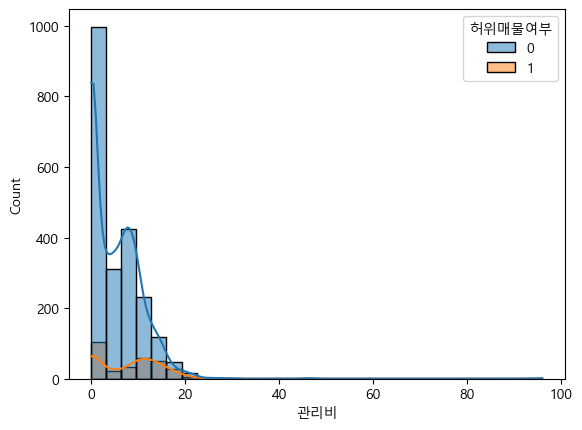

In [43]:
import seaborn as sns

sns.histplot(x = '관리비', data = train, hue = '허위매물여부', kde = True, bins = 30)
plt.show()

## 30~100 사이의 값들을 로그를 사용해 처리해보기

In [45]:
df = pd.DataFrame(train)

df['관리비 이상치처리'] = df['관리비'].apply(lambda x : np.log(x) if 30 <=x<=100 else x)

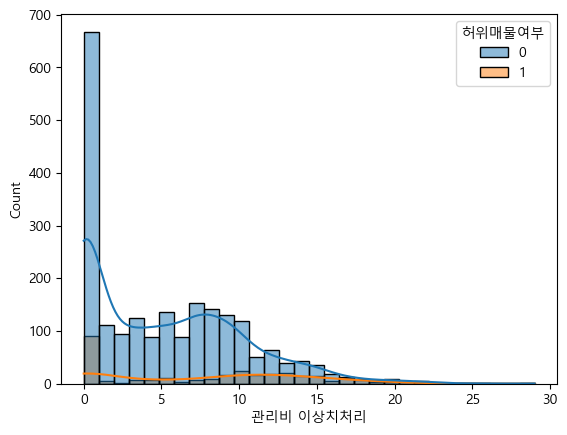

In [47]:
sns.histplot(x = '관리비 이상치처리', data = df, hue = '허위매물여부', kde = True, bins = 30)
plt.show()


### 표준화를 해보는게 더 맞을 듯 함


## 표준화 후 임계값(-3<z<3)을 넘는 이상치를 평균값으로 대체

In [92]:
import numpy as np

# 관리비 데이터 표준화
mean_fee = train['총주차대수'].mean()
std_fee = train['총주차대수'].std()

# Z-Score 계산
train['총주차대수_Z'] = (train['총주차대수'] - mean_fee) / std_fee

# 이상치 탐지 (Z-Score가 3 이상 또는 -3 이하인 경우)
train['총주차대수_이상치'] = np.where(train['총주차대수_Z'].abs() > 3, True, False)

# 이상치 탐지 결과 요약
num_outliers = train['총주차대수_이상치'].sum()
print(f"이상치 개수: {num_outliers}")
print(train[['총주차대수', '총주차대수_Z', '총주차대수_이상치']].head())

# 이상치 처리 (필요에 따라 선택)
# 예: 이상치를 결측치로 변환
train.loc[train['총주차대수_이상치'], '총주차대수'] = np.nan


이상치 개수: 19
   총주차대수   총주차대수_Z  총주차대수_이상치
0   40.0  0.679596      False
1    NaN       NaN      False
2    NaN       NaN      False
3   13.0 -0.253372      False
4    NaN       NaN      False


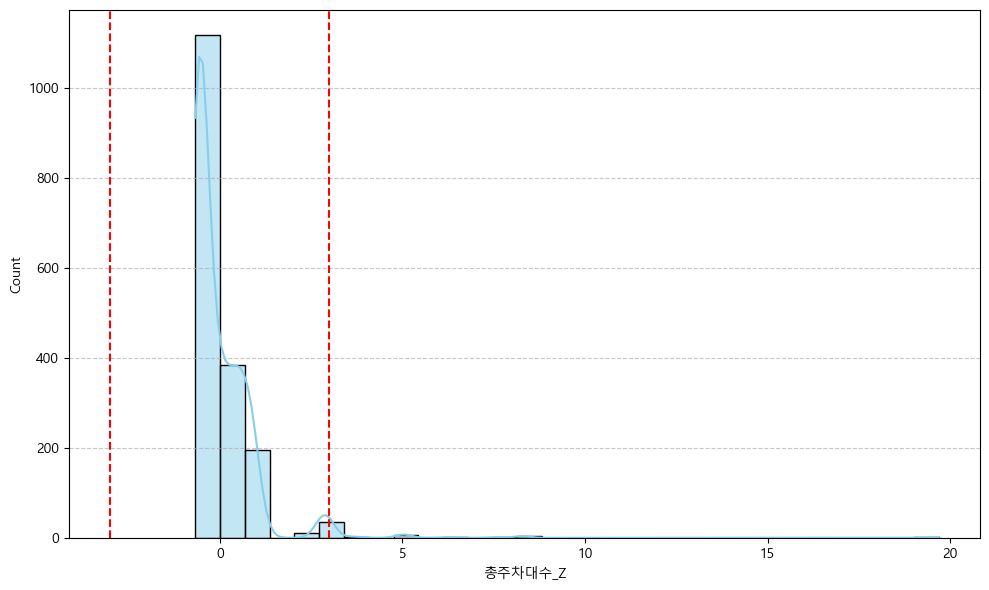

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히스토그램 및 (Z-Score)
plt.figure(figsize=(10, 6))
sns.histplot(train['총주차대수_Z'], kde=True, bins=30, color='skyblue', label='관리비 Z-Score')

# 이상치 경계선 표시 (-3, 3)
plt.axvline(x=3, color='red', linestyle='--', label='Z = 3 (이상치 경계)')
plt.axvline(x=-3, color='red', linestyle='--', label='Z = -3 (이상치 경계)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 출력
plt.tight_layout()
plt.show()


## 게재일을 오래된것과 최근것을 반으로 나누어 평균을 내서 허위매물여부에 어떻게 영향을 미치는지 확인

In [78]:
train['게재일'] = pd.to_datetime(train['게재일'])
sorted_datetime = train.sort_values(by = '게재일')

# 게재일 기준 50% 기준으로 (오래된,최근)으로 나누기
median_date = sorted_datetime['게재일'].median()
sorted_datetime['게재일_그룹'] = sorted_datetime['게재일'].apply(lambda x : '오래된' if x <= median_date
                                                         else '최근')

anova_model = ols('허위매물여부 ~ 게재일_그룹', data = sorted_datetime).fit()
anova_result = sm.stats.anova_lm(anova_model)

print('게재일 ANOVA 분석 결과 : ')
print(anova_result)

게재일 ANOVA 분석 결과 : 
              df      sum_sq    mean_sq           F        PR(>F)
게재일_그룹       1.0   32.320664  32.320664  345.091992  3.576996e-72
Residual  2450.0  229.462370   0.093658         NaN           NaN


In [80]:
# 게재일 오래된,최근 그룹별 허위매물 여부 평균 확인

group_means = sorted_datetime.groupby('게재일_그룹')['허위매물여부'].mean()
print('\n게재일 그룹별 허위매물 여부 평균 : ')
print(group_means)


게재일 그룹별 허위매물 여부 평균 : 
게재일_그룹
오래된    0.236156
최근     0.006536
Name: 허위매물여부, dtype: float64


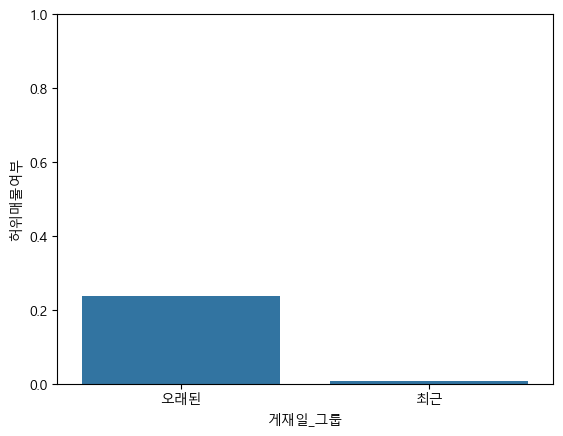

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

group_means = sorted_datetime.groupby('게재일_그룹')['허위매물여부'].mean().reset_index()

sns.barplot(data=group_means, x='게재일_그룹', y='허위매물여부')
plt.ylim(0, 1)
plt.show()

### 결과해석 : 일단 계산해보았지만 잘못된 분석일 확률이 매우매우매우 높음.데이터가 오래된 쪽이 더 많았을 수도 있으므로 일단 참고만 해보기

# 보즘금 세 부분으로 나누어서 시각화 해보기

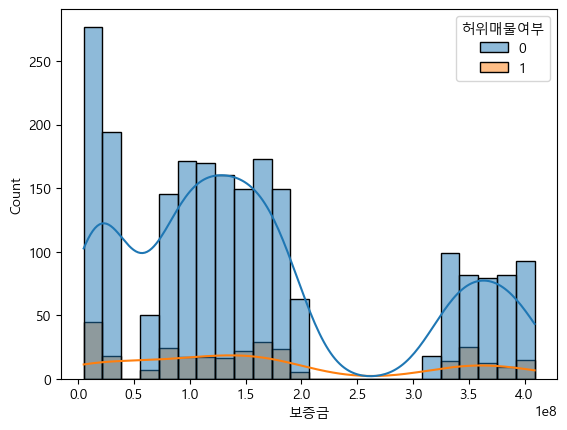

In [96]:
sns.histplot(x = '보증금', data = train, hue = '허위매물여부', kde = True)
plt.show()

## 줄기잎 그래프 그려서 나눌 범위 확인

(<Figure size 750x1100 with 1 Axes>, <Axes: >)

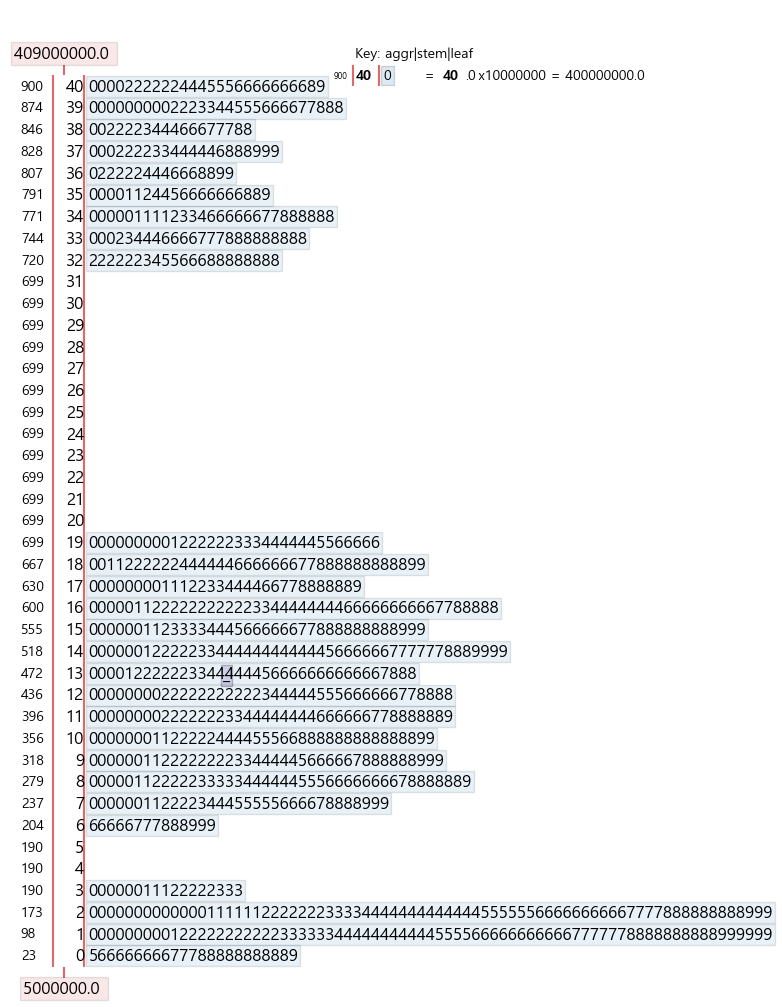

In [128]:
#!pip install stemgraphic
import stemgraphic


stemgraphic.stem_graphic(train['보증금'])

### 세그룹으로 나눠서 부분별 히스토그램 그려보기

In [174]:
d1 = train.loc[train['보증금'] < 40000000]
d2 = train.loc[(train['보증금'] > 40000000) & (train['보증금'] < 200000000)]
d3 = train.loc[train['보증금'] > 200000000]

Text(0, 0.5, '빈도수')

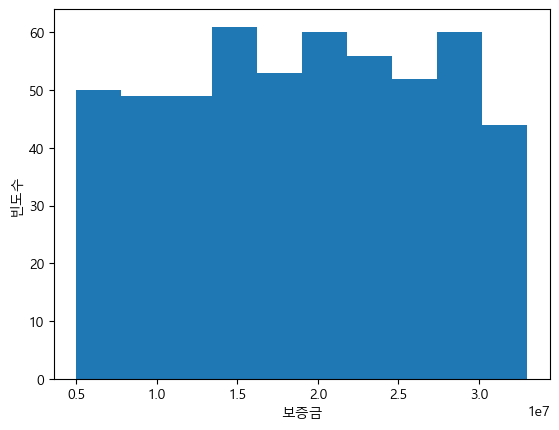

In [191]:
import seaborn as sns

groups = {'저' : d1,
          '중' : d2,
          '고' : d3}

plt.hist(d1['보증금'], label='저')
plt.xlabel('보증금')
plt.ylabel('빈도수')

(array([112., 139., 150., 149., 127., 140., 136., 158., 127., 152.]),
 array([6.5500e+07, 7.8550e+07, 9.1600e+07, 1.0465e+08, 1.1770e+08,
        1.3075e+08, 1.4380e+08, 1.5685e+08, 1.6990e+08, 1.8295e+08,
        1.9600e+08]),
 <BarContainer object of 10 artists>)

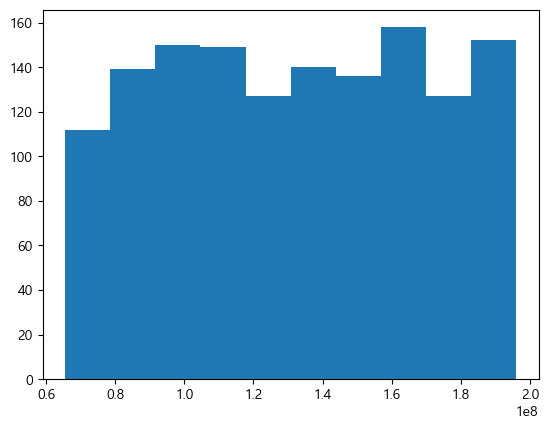

In [192]:
plt.hist(d2['보증금'], label='중')

(array([55., 55., 72., 46., 46., 47., 51., 42., 61., 53.]),
 array([3.2150e+08, 3.3025e+08, 3.3900e+08, 3.4775e+08, 3.5650e+08,
        3.6525e+08, 3.7400e+08, 3.8275e+08, 3.9150e+08, 4.0025e+08,
        4.0900e+08]),
 <BarContainer object of 10 artists>)

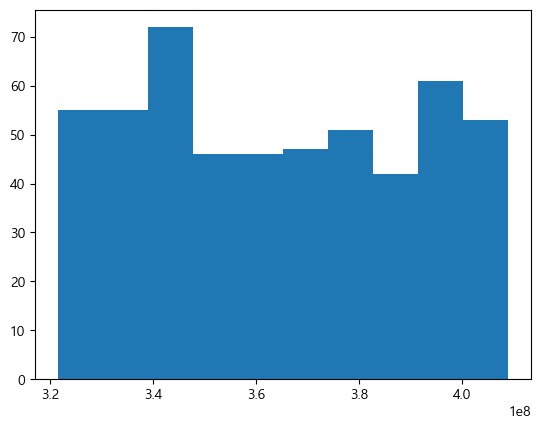

In [193]:
plt.hist(d3['보증금'], label='고')

In [180]:
#train['보증금_그룹화']= pd.qcut(train['보증금'], q = 3, labels = ['저', '중', '고'])

#print(train[['보증금', '보증금_그룹화']].head())

In [179]:
#low_group = train[train['보증금_그룹화'] == '저']


#sns.histplot(x = low_group['보증금'], data = train, hue = '허위매물여부', kde = True)
#plt.show()

In [178]:
#mid_group = train[train['보증금_그룹화'] == '중']


#sns.histplot(x = mid_group['보증금'], data = train, hue = '허위매물여부', kde = True)
#plt.show()

In [177]:
#high_group = train[train['보증금_그룹화'] == '고']


#sns.histplot(x = high_group['보증금'], data = train, hue = '허위매물여부', kde = True)
#plt.show()